In [1]:
import qiskit_metal as qm

In [2]:
from qiskit_metal import designs, draw, MetalGUI, Dict, open_docs
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket
from qiskit_metal.qlibrary.qubits.transmon_pocket_6 import TransmonPocket6
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.tlines.framed_path import RouteFramed
from qiskit_metal.qlibrary.tlines.mixed_path import RouteMixed
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
import numpy as np
from collections import OrderedDict

In [3]:
design = designs.DesignPlanar()
gui = MetalGUI(design)

In [4]:
design.chips.main

{'material': 'silicon',
 'layer_start': '0',
 'layer_end': '2048',
 'size': {'center_x': '0.0mm',
  'center_y': '0.0mm',
  'center_z': '0.0mm',
  'size_x': '9mm',
  'size_y': '6mm',
  'size_z': '-750um',
  'sample_holder_top': '890um',
  'sample_holder_bottom': '1650um'}}

In [5]:
def ChipSize(x:str, y:str, cheese: bool = False, layer: int = 0):
    design.chips.main.size.size_x = x
    design.chips.main.size.size_y = y
    design.chips.default_settings['cheese'] = cheese
    design.chips.default_settings['layer_start'] = layer

In [6]:
ChipSize('11mm', '11mm', False, 0)

In [7]:
def guidraw(n=1, dlt=False, hlt=False):
    if dlt:
        gui.rebuild()
        gui.screenshot()
    else:
        gui.rebuild()
        gui.autoscale()
        all_component_names = design.components.keys()
        #if n==1:
            #gui.edit_component(['Q1'])
        gui.zoom_on_components(all_component_names)
        if hlt:
            all_component_names = design.components.keys()
            gui.highlight_components(all_component_names)
        gui.screenshot()

In [8]:
def clean():
    design.delete_all_components()

In [9]:
def QTree3(a=6, n=):
    qudict = Dict()
    offset = '125um'
    design.overwrite_enabled = True
    options = Dict(
        pad_width = '450um',
        pocket_width = '650um',
        connection_pads = Dict(
            ip = Dict(loc_W= +0, loc_H = -1, pad_width = '90um'),
            left = Dict(loc_W= -1, loc_H = +1, pad_width = '90um'),
            right = Dict(loc_W= +1, loc_H = +1, pad_width = '90um')
        ),
    layer = 0
    )
    for i in range(n):
        qudict[f'q{i}'] = TransmonPocket6(design, 'Q1', options=Dict(pos_x='+0.00mm',pos_y='0mm', orientation = 0, **options))
    #q2 = TransmonPocket6(design, 'Q2', options=Dict(pos_x= str(a/2)+'0mm',pos_y=offset, orientation = -90, **options))
    #q3 = TransmonPocket6(design, 'Q3', options=Dict(pos_x= str(-a/2)+'0mm',pos_y=offset, orientation = 90, **options))
    guidraw(n=n, hlt=True)

SyntaxError: invalid syntax (978972162.py, line 1)

In [ ]:
QTree3()

In [ ]:
clean()

In [ ]:
def connections(total_length:str, com1:str, pin1:str, com2: str, pin2: str, st_st:str, end_st: str, asym):
    ops = Dict(fillet = '99.99um')
    myopts= Dict(
        total_length = total_length,
        hfss_wire_bonds = True,
        pin_inputs = Dict(
            start_pin = Dict(
                component = com1,
                pin = pin1
            ),
            end_pin = Dict(
                component = com2,
                pin = pin2
            )
        ),
        lead = Dict(
            start_straight = st_st,
            end_straight = end_st
        ),
        meander = Dict(
            #spacing = spacing,
            asymmetry = asym
        ),
        layer = 0,
        **ops
    )

    try: 
        cpw.delete()
    except NameError: pass

    cpw = RouteMeander(design, options=myopts)

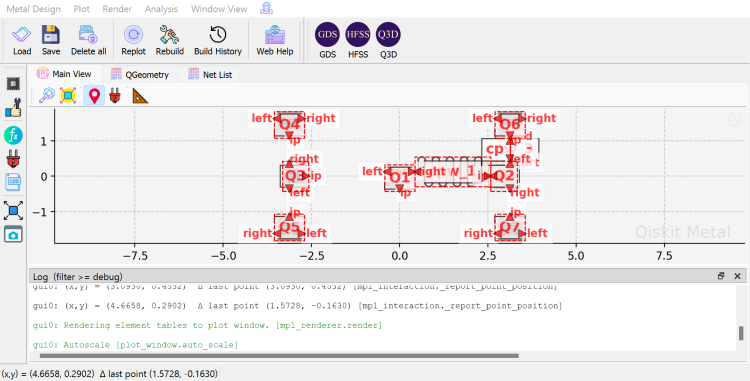

In [14]:
a=6
k = 0.5
offset = 0.125
design.overwrite_enabled = True
options = Dict(
    pad_width = '450um',
    pocket_width = '650um',
    connection_pads = Dict(
        ip = Dict(loc_W= +0, loc_H = -1, pad_width = '90um'),
        left = Dict(loc_W= -1, loc_H = +1, pad_width = '90um'),
        right = Dict(loc_W= +1, loc_H = +1, pad_width = '90um')
    ),
    layer = 0
)
    #for i in range(n):
q1 = TransmonPocket6(design, 'Q1', options=Dict(pos_x='+0.00mm',pos_y='0mm', orientation = 0, **options))

#first branch
q2 = TransmonPocket6(design, 'Q2', options=Dict(pos_x= str(k*a)+'0mm',pos_y= str(offset) + 'um', orientation = -90, **options))
q3 = TransmonPocket6(design, 'Q3', options=Dict(pos_x= str(-k*a)+'0mm',pos_y= str(offset) + 'um', orientation = 90, **options))

#second branch
q4 = TransmonPocket6(design, 'Q4', options=Dict(pos_x= str(-k*a-offset)+'0mm',pos_y=str(k**2*a) + '0mm', orientation = 0, **options))
q5 = TransmonPocket6(design, 'Q5', options=Dict(pos_x= str(-k*a-offset)+'0mm',pos_y=str(-k**2*a) + '0mm', orientation = 90*2, **options))
q6 = TransmonPocket6(design, 'Q6', options=Dict(pos_x= str(k*a+offset)+'0mm',pos_y=str(k**2*a) + '0mm', orientation = 0, **options))
q7 = TransmonPocket6(design, 'Q7', options=Dict(pos_x= str(k*a+offset)+'0mm',pos_y=str(-k**2*a) + '0mm', orientation = 90*2, **options))

guidraw(n=7, hlt=True)

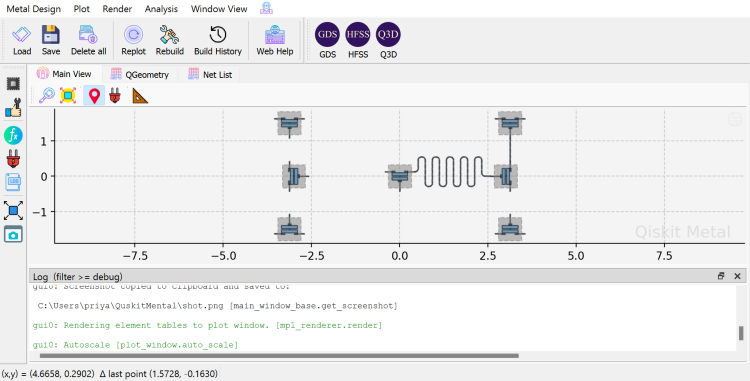

In [15]:
jogsS = OrderedDict()
jogsE = OrderedDict()
ops = Dict(fillet = '90um')

jogl = '200um'  
for i in range(10):
    if i==0:
        jogsS[i] = ['L', jogl]
    elif i%4==1:
        jogsS[i] = ['L', jogl]
        jogsS[i+1] = ['R', jogl]
    elif i%4==3:
        jogsS[i] = ['R', jogl]
        jogsS[i+1] = ['L', jogl]

for i in range(10):
    if i==0:
        jogsE[i] = ['R', jogl]
    elif i%4==1:
        jogsE[i] = ['R', jogl]
        jogsE[i+1] = ['L', jogl]
    elif i%4==3:
        jogsE[i] = ['L', jogl]
        jogsE[i+1] = ['R', jogl]
        
options = Dict(
    total_length = '9mm',
    pin_inputs = Dict(
        start_pin = Dict(
            component = 'Q1',
            pin = 'right'
        ),
        end_pin = Dict(
            component = 'Q2',
            pin = 'ip'
        )
    ),
    lead = Dict(
        start_straight = '0.1mm',
        end_straight = '0.0mm',
        #start_jogged_extension = jogsS,
        #end_jogged_extension = jogsE
    ),
    meander = Dict(
        spacing = '200um',
        asymmetry = '-0.5um'
    ),
    layer = 0,
    **ops
)

try:
    cpw23.delete()
except NameError: pass

cpw23  = RouteMeander(design, options=options)

guidraw(n=3)

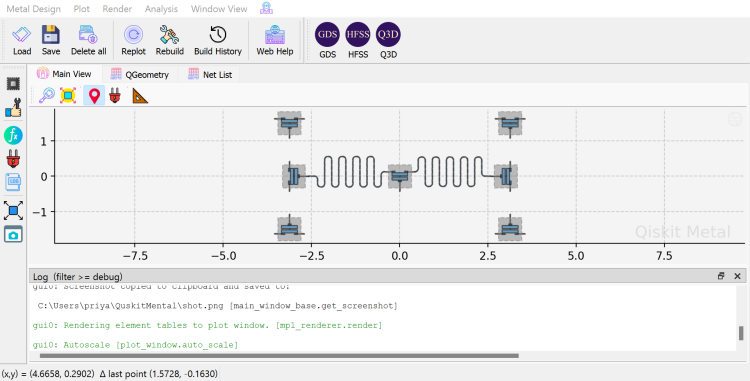

In [16]:
jogsS = OrderedDict()
jogsE = OrderedDict()
ops = Dict(fillet = '90um')

jogl = '200um'  
for i in range(10):
    if i==0:
        jogsS[i] = ['L', jogl]
    elif i%4==1:
        jogsS[i] = ['L', jogl]
        jogsS[i+1] = ['R', jogl]
    elif i%4==3:
        jogsS[i] = ['R', jogl]
        jogsS[i+1] = ['L', jogl]

for i in range(10):
    if i==0:
        jogsE[i] = ['R', jogl]
    elif i%4==1:
        jogsE[i] = ['R', jogl]
        jogsE[i+1] = ['L', jogl]
    elif i%4==3:
        jogsE[i] = ['L', jogl]
        jogsE[i+1] = ['R', jogl]


options = Dict(
    total_length = '9mm',
    pin_inputs = Dict(
        start_pin = Dict(
            component = 'Q1',
            pin = 'left'
        ),
        end_pin = Dict(
            component = 'Q3',
            pin = 'ip'
        )
    ),
    lead = Dict(
        start_straight = '0.1mm',
        end_straight = '0.0mm',
        #start_jogged_extension = jogsS,
        #end_jogged_extension = jogsE
    ),
    meander = Dict(
        spacing = '200um',
        asymmetry = '+0.5um'
    ),
    layer = 0,
    **ops
)

try:
    cpw13.delete()
except NameError: pass

cpw13 = RouteMeander(design, options=options)

guidraw(n=3)

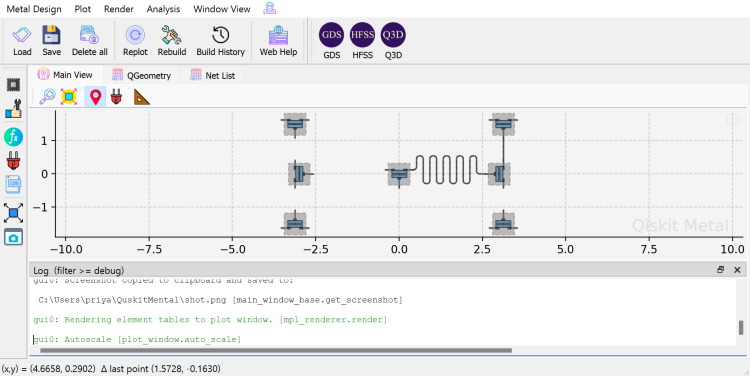

In [17]:
options = Dict(
    total_length = '3mm',
    pin_inputs = Dict(
        start_pin = Dict(
            component = 'Q2',
            pin = 'left'
        ),
        end_pin = Dict(
            component = 'Q6',
            pin = 'ip'
        )
    ),
    lead = Dict(
        start_straight = '0.1mm',
        end_straight = '0.0mm',
        #start_jogged_extension = jogsS,
        #end_jogged_extension = jogsE
    ),
    meander = Dict(
        spacing = '200um',
        asymmetry = '+0.5um'
    ),
    layer = 0,
    **ops
)

try:
    cpw13.delete()
except NameError: pass

cpw13 = RoutePathfinder(design, options=options)

guidraw(n=3)